# NLP Movie Genre Classification - EDA & Preparation

### by Andrew Alarcon

## Introduction

The purpose of this notebook is to clean the data I will be working with in this project.
This dataset was obtained through Kaggle, which was scraped using the IMDb API. The data consists of the descriptions of a variety of movies and shows.


## Importing the Libraries

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import re
import statistics as stats

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MultiLabelBinarizer
from nltk.corpus import stopwords 
import nltk

import re

#pd.set_option('display.max_rows', None)
#pd.set_option('display.max_columns', None)

### Reading in the Data

In [64]:
data = pd.read_csv('data/movies.csv')

In [65]:
data.head()

,Oscar et la dame rose (2009),drama,"Listening in to a conversation between his doctor and parents, 10-year-old Oscar learns what nobody has the courage to tell him. He only has a few weeks to live. Furious, he refuses to speak to anyone except straight-talking Rose, the lady in pink he meets on the hospital stairs. As Christmas approaches, Rose uses her fantastical experiences as a professional wrestler, her imagination, wit and charm to allow Oscar to live life and love to the full, in the company of his friends Pop Corn, Einstein, Bacon and childhood sweetheart Peggy Blue."
0,Cupid (1997),thriller,A brother and sister with a past incestuous r...
1,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
2,The Unrecovered (2007),drama,The film's title refers not only to the un-re...
3,Quality Control (2011),documentary,Quality Control consists of a series of 16mm ...
4,"""Pink Slip"" (2009)",comedy,In tough economic times Max and Joey have all...


## Data Cleaning

Looking at the first 5 rows, we see that the first row is being treated as the column names. Let's fix this by setting it as the first row and then correctly naming the columns.

In [66]:
#using vstack to stack the column names of data and set it to the
#first row of dataframe
data = pd.DataFrame(np.vstack([data.columns, data]))

In [67]:
data.head()

,0,1,2
0,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
1,Cupid (1997),thriller,A brother and sister with a past incestuous r...
2,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
3,The Unrecovered (2007),drama,The film's title refers not only to the un-re...
4,Quality Control (2011),documentary,Quality Control consists of a series of 16mm ...


Let's appropriately name the columns as `Title`, `Genre`, and `Description`.

In [68]:
data.rename(columns = {0:'Title', 1:'Genre', 2: 'Description'}, inplace = True)


In [69]:
data.head()

,Title,Genre,Description
0,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
1,Cupid (1997),thriller,A brother and sister with a past incestuous r...
2,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
3,The Unrecovered (2007),drama,The film's title refers not only to the un-re...
4,Quality Control (2011),documentary,Quality Control consists of a series of 16mm ...


Now, we will create a Year column based of the years in the parenthesis in the Title column.

In [70]:
#Using regex to correctly gather the year information in Title
#source: https://stackoverflow.com/questions/13807207/regex-find-a-number-between-parentheses

myre = re.compile("\([^\d]*(\d+)[^\d]*\)")
data = data.assign(Year=data['Title'].str.extract(myre))


In [71]:
data.head()

,Title,Genre,Description,Year
0,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...,2009
1,Cupid (1997),thriller,A brother and sister with a past incestuous r...,1997
2,The Secret Sin (1915),drama,To help their unemployed father make ends mee...,1915
3,The Unrecovered (2007),drama,The film's title refers not only to the un-re...,2007
4,Quality Control (2011),documentary,Quality Control consists of a series of 16mm ...,2011


In [72]:
data.shape

(53624, 4)

In [73]:
list(data['Genre'].unique())

[' drama ',
 ' thriller ',
 ' documentary ',
 ' comedy ',
 ' crime ',
 ' reality-tv ',
 ' horror ',
 ' sport ',
 ' animation ',
 ' action ',
 ' fantasy ',
 ' short ',
 ' sci-fi ',
 ' music ',
 ' adventure ',
 ' talk-show ',
 ' western ',
 ' family ',
 ' mystery ',
 ' history ',
 ' news ',
 ' biography ',
 ' romance ',
 ' game-show ',
 ' musical ',
 ' war ']

In [74]:
data['Genre'].nunique()

26

There are 26 different genre's in this dataframe!

Checking the amount of NAN values in each columns:

In [75]:
data.isna().sum() / len(data)

Title          0.00000
Genre          0.00000
Description    0.00000
Year           0.05022
dtype: float64

In [76]:
data['Year'].isna().sum()

2693

There are 2,693 missing values in the Year column. This is about 5% of the dataset. Since this is less than 5% of the data, let's just remove these rows from the dataset.

In [77]:
df = data.dropna(axis=0)

In [78]:
df.isna().sum() / len(df)

Title          0.0
Genre          0.0
Description    0.0
Year           0.0
dtype: float64

Here, I will remove anything that isn't an alphabet, remove white spaces, and convert all of the words to lower case.

In [79]:
def cleaning(text):
    
    """
    A function that has text of a row passed in.
    Converts all leetters to lowercase, and removes unnecessary white spaces.
    
    """
    
    
    text = re.sub("[^a-zA-Z]"," ",text) 

    text = ' '.join(text.split()) 
 
    text = text.lower() 
    
    return text

In [80]:
df['Description'] = df['Description'].apply(lambda text: cleaning(text))

/var/folders/mw/w5y8whxj0919pq__lh725wz80000gn/T/ipykernel_4436/1149484941.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [81]:
# Doing the same for Genre
df['Genre'] = df['Genre'].apply(lambda text: cleaning(text))

/var/folders/mw/w5y8whxj0919pq__lh725wz80000gn/T/ipykernel_4436/2209778426.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [82]:
# Exporting the clean dataset. This file will be used again in Notebook 4, where I'll be working with Nueral Networks.

df.to_csv('/Users/andrewalarcon/Desktop/Work/Brainstation/Capstone/capstone-repo/data/clean_data.csv', index=False)



## Exploratory Data Analysis



In this section, I will visualize how many movies are of each genre, as well as the most popular genre for every year. I will also create a bag of words model in order to see the most common words amongst specific genres of movies. Later, I will also look at the weight of the most significant words by genre by using a TF-IDF vectorizer.

In [83]:
df.head()

,Title,Genre,Description,Year
0,Oscar et la dame rose (2009),drama,listening in to a conversation between his doc...,2009
1,Cupid (1997),thriller,a brother and sister with a past incestuous re...,1997
2,The Secret Sin (1915),drama,to help their unemployed father make ends meet...,1915
3,The Unrecovered (2007),drama,the film s title refers not only to the un rec...,2007
4,Quality Control (2011),documentary,quality control consists of a series of mm sin...,2011


In [84]:
# Getting the value counts of each genre
genre_counts = pd.DataFrame(df['Genre'].value_counts()).reset_index()

In [85]:
genre_counts = genre_counts.rename(columns = {'Genre': 'Count', 'index': 'Genre'})

In [86]:
genre_counts.head()

,Genre,Count
0,documentary,12858
1,drama,12819
2,comedy,7104
3,short,5018
4,horror,1984


In [87]:
genre_counts = genre_counts.sort_values(by='Count', ascending=True)

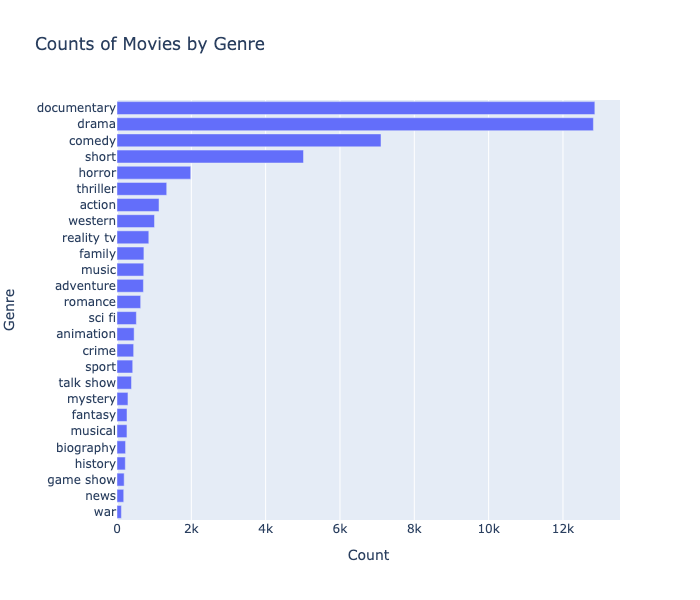

In [88]:
fig = px.bar(genre_counts, x ='Count', y='Genre', 
             title='Counts of Movies by Genre', orientation='h', height=600)


fig.show("png")

Here, `documentary` and `drama` genres are populating the dataset the most. However, note that there's quite a few genres that are under the 200 count mark. This could be an issue when we start modeling becuase my models will have little data to work with in terms of these genre's. This could throw off its predicting capabilities.

So, for the sake of comparing models in the future, I will create 2 datasets. One will include the data displayed above, and the other will exclude the bottom 3 genres. I will train my models and see if the lack of data improves the performance. This will be done at a later step, when I am about to split the data.

Before I move on though, I want to check the percentage of data these 3 genre's take up in the entire dataset.

In [89]:
(len(df[df['Genre'] == 'war']) + len(df[df['Genre'] == 'news']) + len(df[df['Genre'] == 'game show']))/len(df)

0.009660128409023973

Looks like these three genre's take up less than 1% of the dataset. So this supports my desire to drop this information in the future.

Let's look at the average word count for the descriptions by genre.

Here I will create a new dataframe that contains the average length of movie descriptions based on the genre.

In [90]:
# Grouping by Genre to get the descriptions, then splitting all descriptions and getting the mean length
# for each genre.
desc_count = pd.DataFrame(df.groupby('Genre')['Description']\
             .apply(lambda x: x.str.split().str.len().mean())).reset_index()



In [91]:
desc_count.sort_values(by=['Description'], inplace=True, ascending=False) 
#order by the description word count

In [92]:
#rename the Description column
desc_count = desc_count.rename(columns={'Description': 'Average Word Count'})

In [93]:
desc_count.head()

,Genre,Average Word Count
10,game show,130.523316
25,western,125.177403
15,mystery,117.555932
18,romance,114.819466
24,war,113.542373


In [94]:
desc_count = desc_count.sort_values(by='Average Word Count', ascending=True)

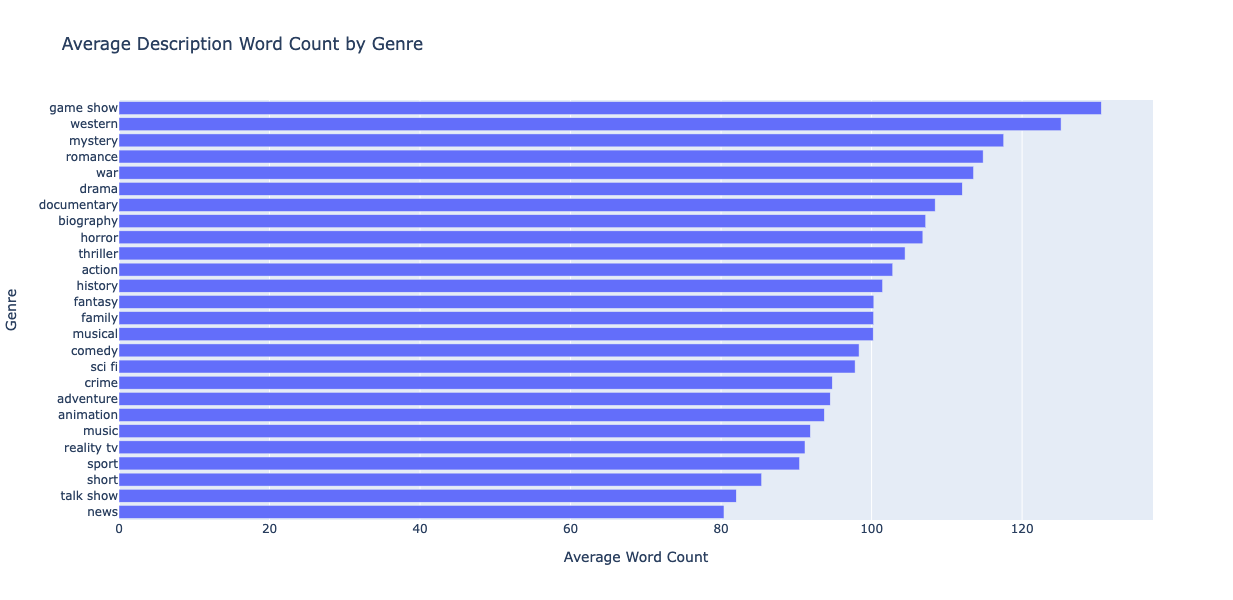

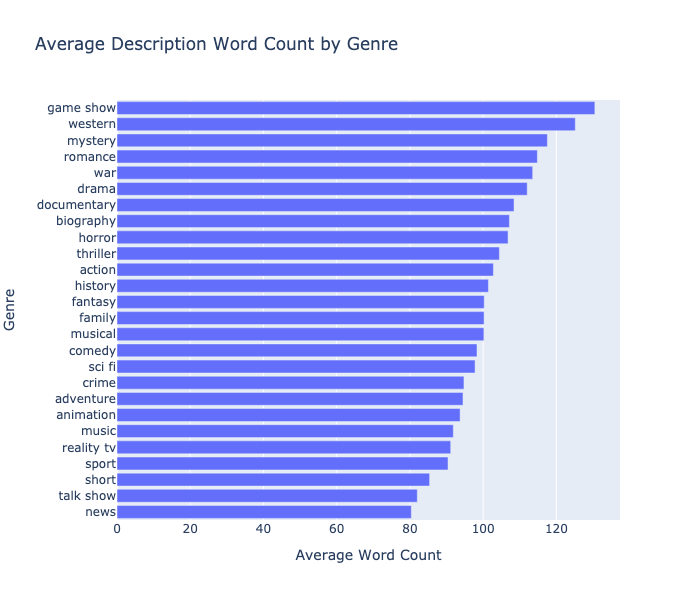

In [95]:
fig = px.bar(desc_count, x ='Average Word Count', y='Genre', 
             title='Average Description Word Count by Genre', orientation='h', height=600)
fig.show()
fig.show("png")

Here we see that the top 3 genre's in terms of word count are `game-show`, `mystery`, and `war`. Let's look into some examples of movies that fall under these categories.

In [96]:
df[df['Genre'] == 'game show'].head(10)

,Title,Genre,Description,Year
723,"""Picture! Picture!"" (2013)",game show,the one hour game show will be hosted by come ...,2013
1019,"""Are You Normal, America?"" (2012)",game show,new game show that will help viewers figure ou...,2012
1482,"""Scrapheap"" (1998)",game show,a show in which each week two rival teams are ...,1998
1659,"""Tien voor taal"" (1990)",game show,two teams of usually well known professionals ...,1990
1715,"""It's a Knockout"" (1985)",game show,it s a knockout was a loud colourful and downr...,1985
1893,"""Anyone Can Win"" (1953)",game show,moderated by well known cartoonist and humoris...,1953
2068,"""Pontoon Payday"" (2015)",game show,host frank nicotero invites partiers aboard a ...,2015
2080,"""Grand Slam"" (2003)",game show,the ultimate quiz show grand slam pitted the f...,2003
2366,Spelling Night in Canada 2012 (2012),game show,the finalists from across the country face off...,2012
2695,"""Yahtzee"" (1988)",game show,two teams of three contestants competed with c...,1988


In [97]:
df[df['Genre'] == 'mystery'].head(10)

,Title,Genre,Description,Year
83,"Crossing Over: Angels, Spirit Guides and Eart...",mystery,diana palm is a medium paranormal investigator...,2014
101,Shin kagiana karamiau shita to shita (2005),mystery,a beautiful woman marries a wealthy man who fo...,2005
621,The Invisible Hours (2017),mystery,a group of strangers receive a curious invitat...,2017
631,The Longest Night (2012),mystery,john dean arrives in the uk to track down a ki...,2012
876,Chamber of Shadows (2009),mystery,after the murder of her techno genius boyfrien...,2009
1314,Blind Adventure (1933),mystery,robert armstrong plays richard bruce an americ...,1933
1365,Longchamps (2011),mystery,the third world war has broken out the earth i...,2011
1448,Murder at High Tea (2014),mystery,after a string of bizarre mishaps at the la la...,2014
1817,Sherlock Holmes and the Shadow Watchers (2011),mystery,the sensational details of a gruesome murder i...,2011
2497,"""Mystery Ink"" (2003)",mystery,mystery ink is a one stop show for fans of mys...,2003


In [98]:
df[df['Genre'] == 'war'].head(10)

,Title,Genre,Description,Year
1159,Black Friday: Dark Dawn II (2014),war,in this sequel film to the black friday dark d...,2014
1389,Jeungeon (1974),war,lieutenant jang has plans for the weekend with...,1974
1554,"""Da Jue Ze"" (2012)",war,the summer of the japanese launched an all out...,2012
2296,Flight 208 (2007),war,an experiment in style thought it travels in s...,2007
2752,Tren (1978),war,a young man from the banks of the ibar river g...,1978
3092,Geojedo: The 3rd Frontline (2017),war,the geojedo p o w camp prisoner of war camp wa...,2017
3866,Dom Zauvijek (2012),war,during the homeland war croatia was devastated...,2012
4330,Siroko je lisce (1981),war,the action takes place in and today and a part...,1981
4714,Bataan (1943),war,japan has just invaded the phillipines and the...,1943
5037,Snaiper 2. Tungus (2012),war,world war eastern front a new batch of raw ine...,2012


Let's now look at the distribution of description lengths.

In [99]:
# copying the dataframe in case any mistakes are made.
descr_len_df = df.copy()

In [100]:
descr_len_df

descr_len_df['Description Length'] = descr_len_df['Description'].astype(str).map(len)

In [101]:
descr_len_df.head()

,Title,Genre,Description,Year,Description Length
0,Oscar et la dame rose (2009),drama,listening in to a conversation between his doc...,2009,529
1,Cupid (1997),thriller,a brother and sister with a past incestuous re...,1997,181
2,The Secret Sin (1915),drama,to help their unemployed father make ends meet...,1915,1056
3,The Unrecovered (2007),drama,the film s title refers not only to the un rec...,2007,603
4,Quality Control (2011),documentary,quality control consists of a series of mm sin...,2011,1531


In [102]:
# sorting the dataframe by description length
descr_len_df = descr_len_df.sort_values(by='Description Length', ascending=False)

Let's count how many movies are above the 1000 word range.

In [103]:
descr_len_df.shape

(50931, 5)

In [104]:
50931*.05

2546.55

Since about 5% of the dataset is around 2,546 values, I will be comfortable with removing this amount from the dataframe for visualization purposes if I need to.

In [105]:
descr_len_df[descr_len_df['Description Length'] > 1400].shape

(2496, 5)

Since about 2,496 rows contain descriptions longer than 1,400 words, let's remove these rows and then visualize the distribution.

In [106]:
# dropping the rows
descr_len_df2 = descr_len_df.drop(descr_len_df.index[:2496])

In [107]:
descr_len_df2.head()

,Title,Genre,Description,Year,Description Length
49771,"""Young, Dumb and Living Off Mum"" (2009)",reality tv,can parents of extremely spoilt teenagers reve...,2009,1400
3857,The Delinquents (1957),drama,scotty white age must stop going steady with j...,1957,1400
14563,At Midnight (1913/III),short,visiting her father s office in company with h...,1913,1400
11193,Sengoku: Bloody Agent (2013),action,aika ayumi kinoshita from sonny chiba s legend...,2013,1400
36200,Saved by Deportation (2007),documentary,in a year before the nazis started deporting j...,2007,1400


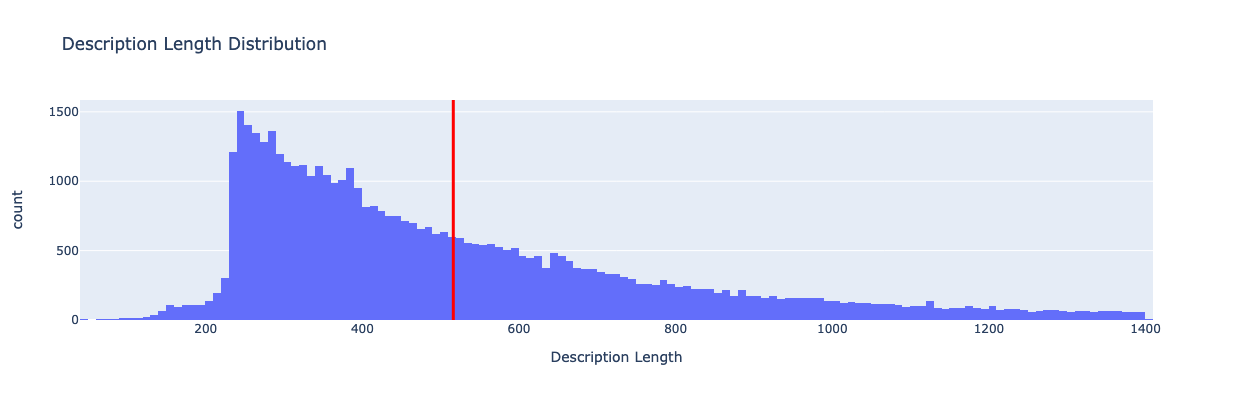

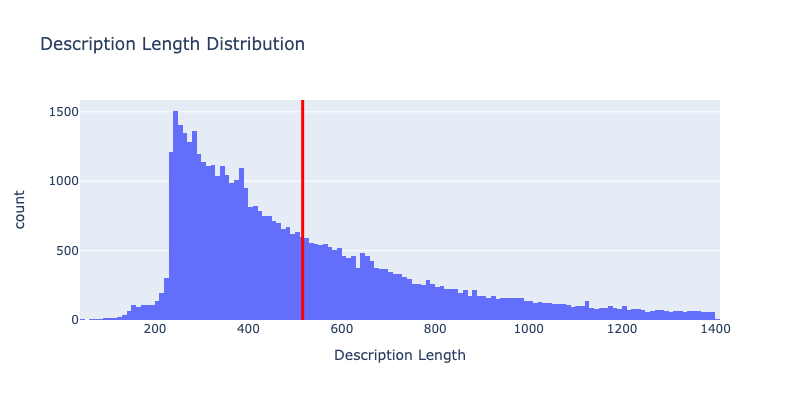

In [108]:
fig = px.histogram(descr_len_df2, x="Description Length", title='Description Length Distribution', width=800, height=400)
fig.add_vline(x=descr_len_df2['Description Length'].mean(), line_width=3, line_color="red")
fig.show()
fig.show("png")

Here we see that most items in the dataframe have a description length of around 240 words.

Let's now see the distributions across each genre.

In [109]:
def plot_decription_distr(df):
    
    """
    Takes in a dataframe and creates a plot of description length distributions 
    across all genres.
    """
    
    genres = df['Genre'].unique()
    
    for genre in genres:
        
        genre_cap = genre.capitalize()
        
        fig = px.histogram(df[df['Genre'] == genre], x="Description Length", title=f'Description Length Distribution for {genre_cap}', width=800, height=400)
        fig.add_vline(x=df[df['Genre'] == genre]['Description Length'].mean(), line_width=3, line_color="red")
        fig.show("png")
    


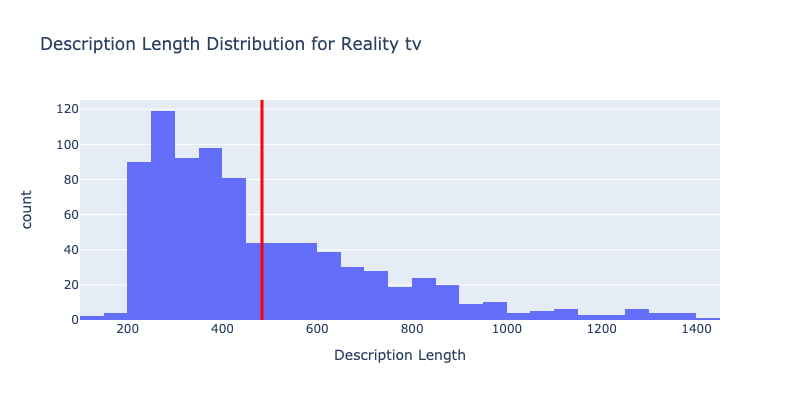

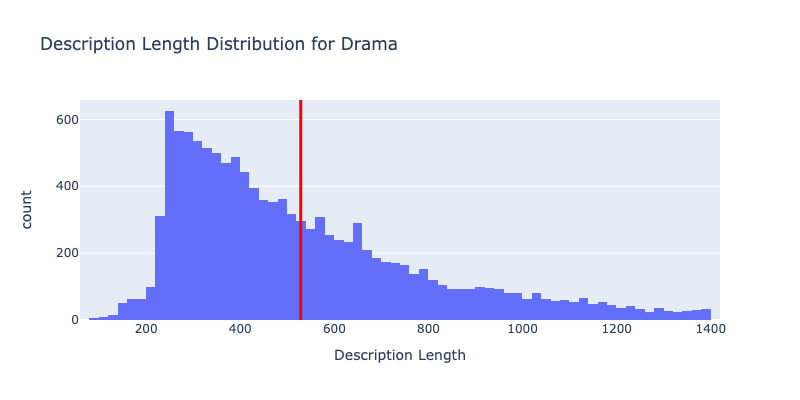

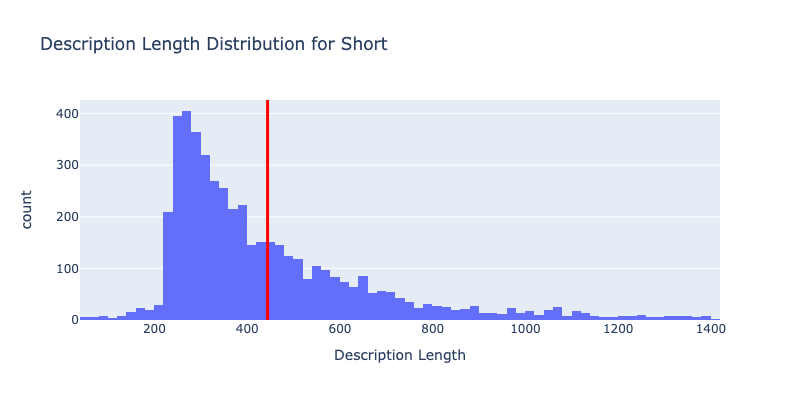

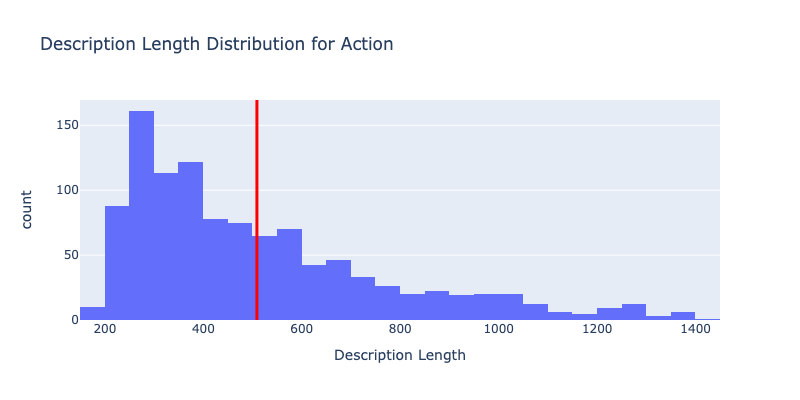

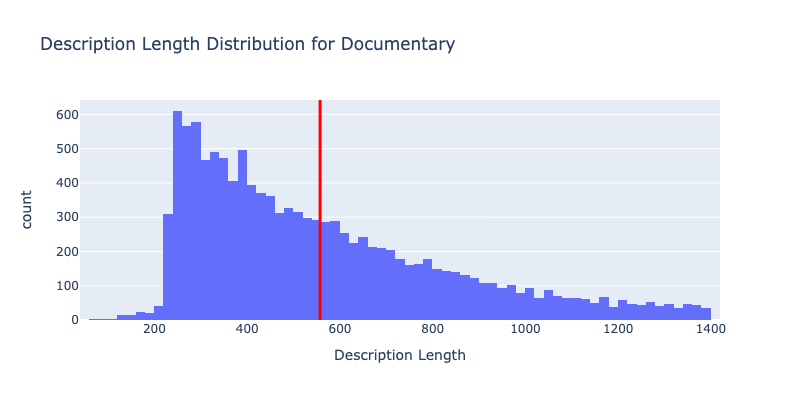

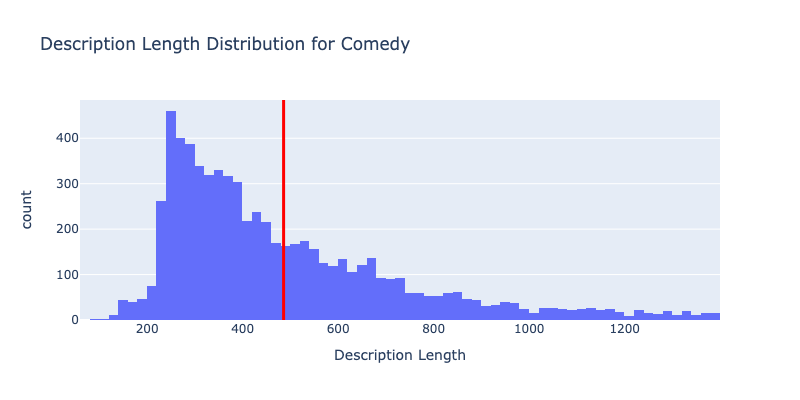

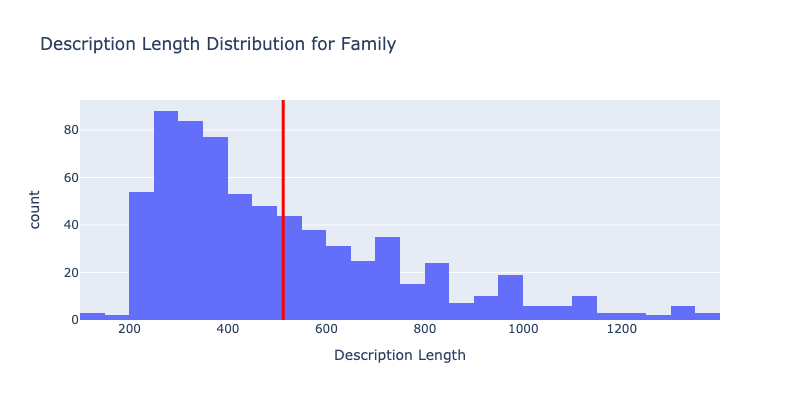

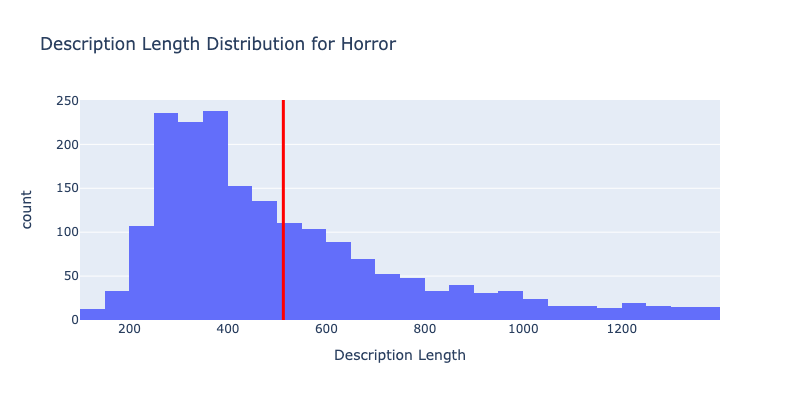

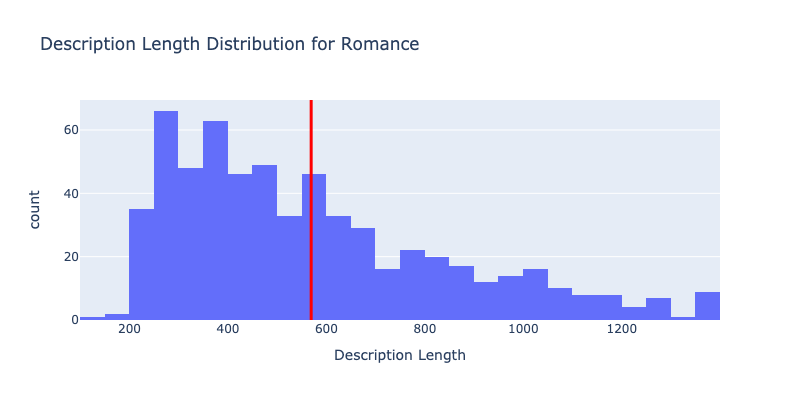

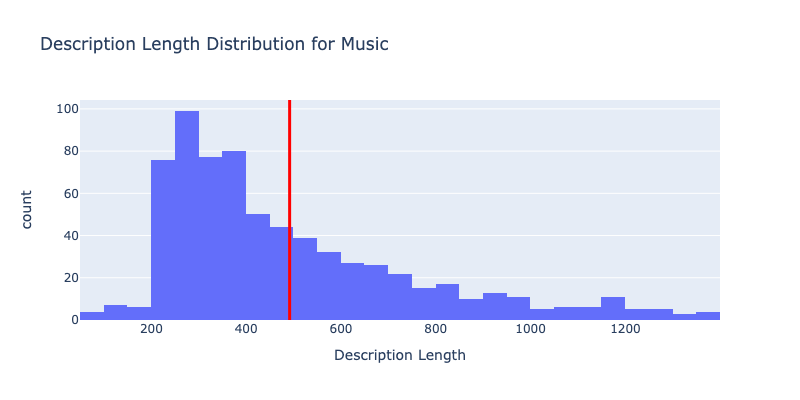

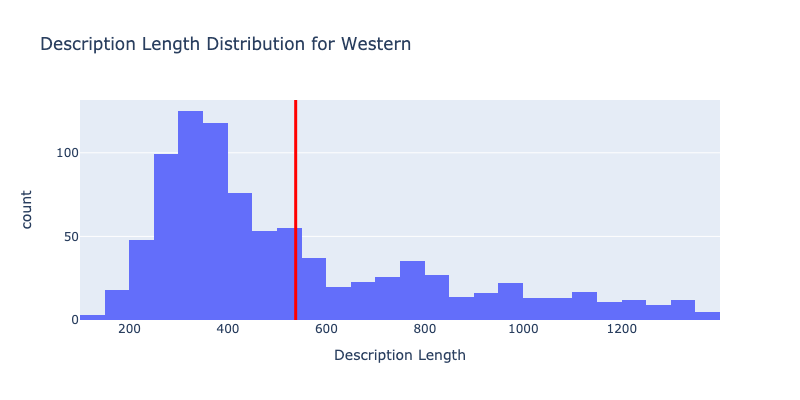

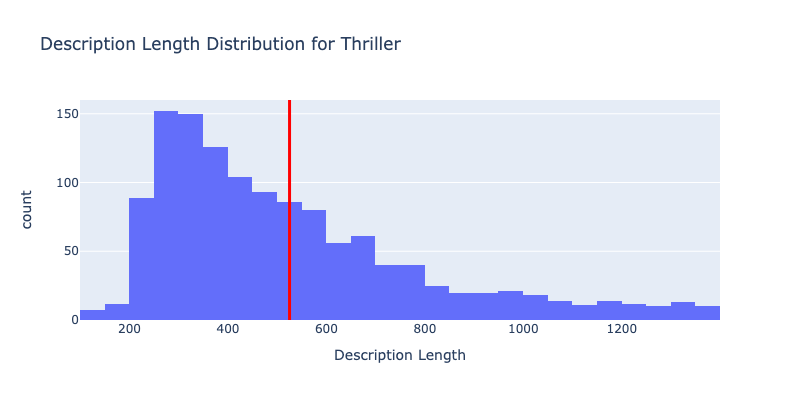

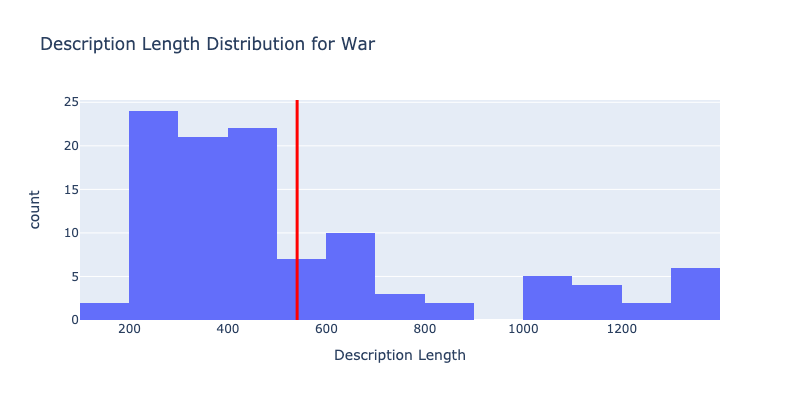

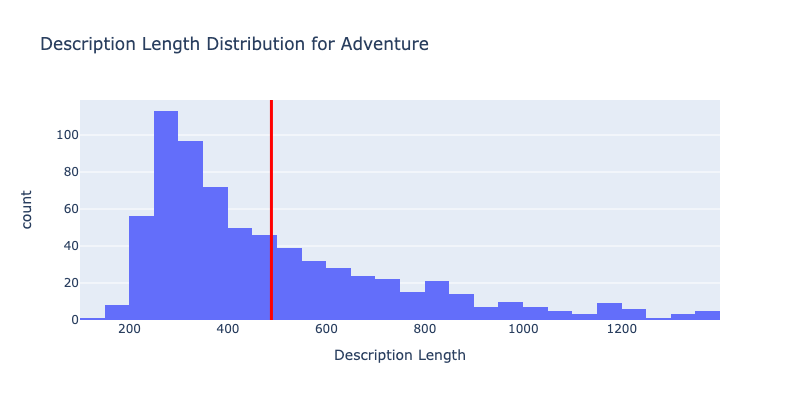

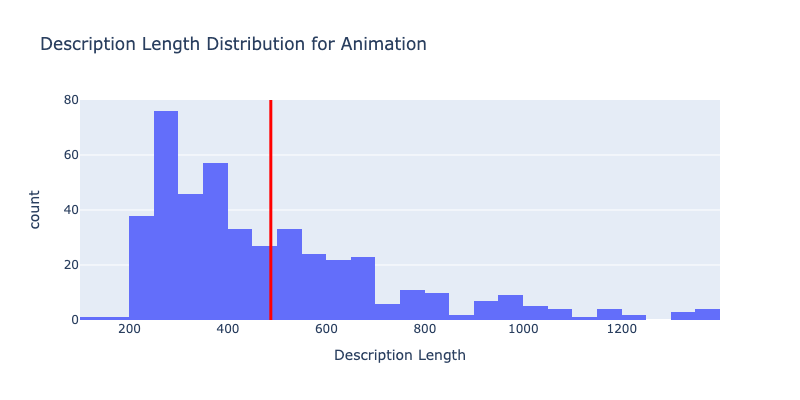

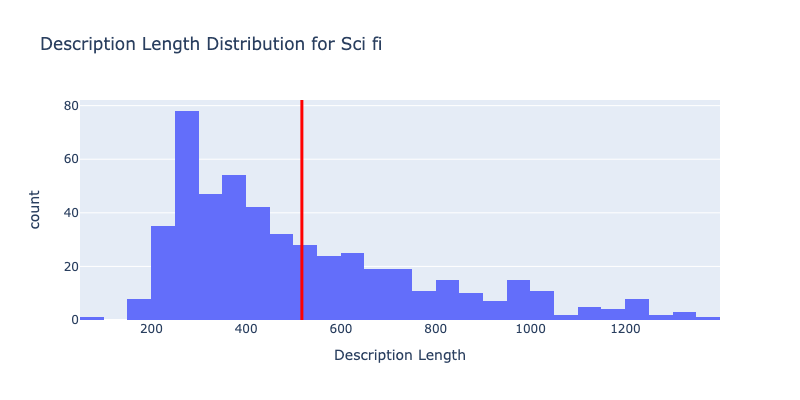

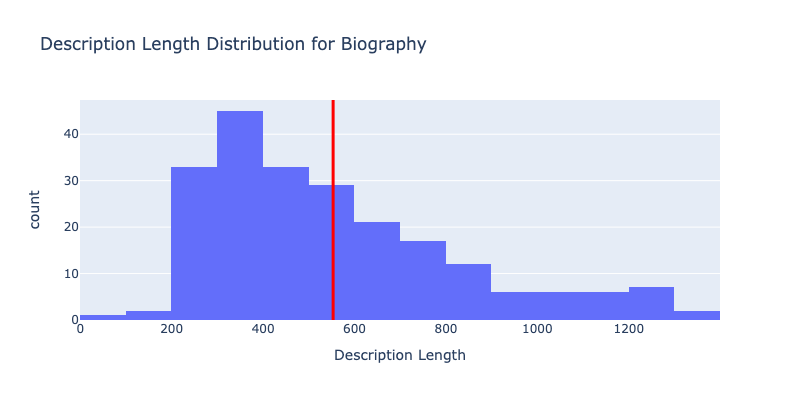

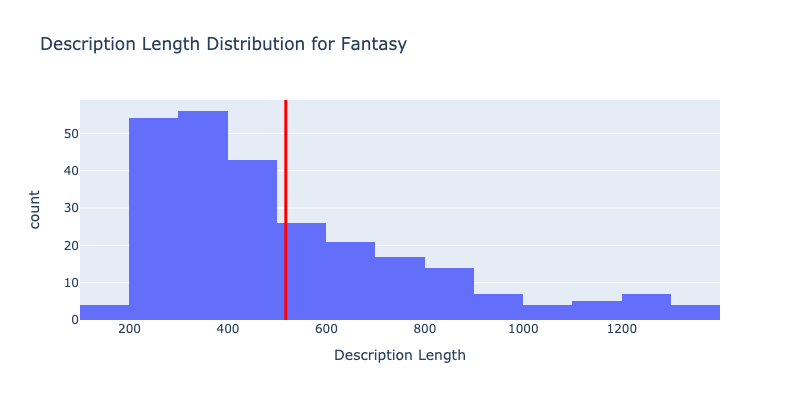

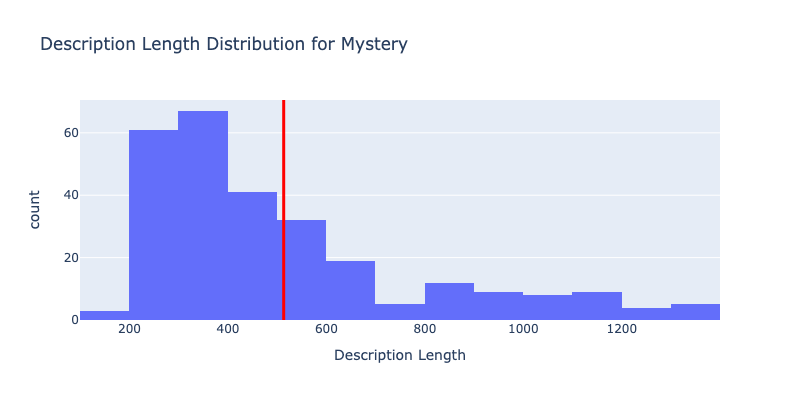

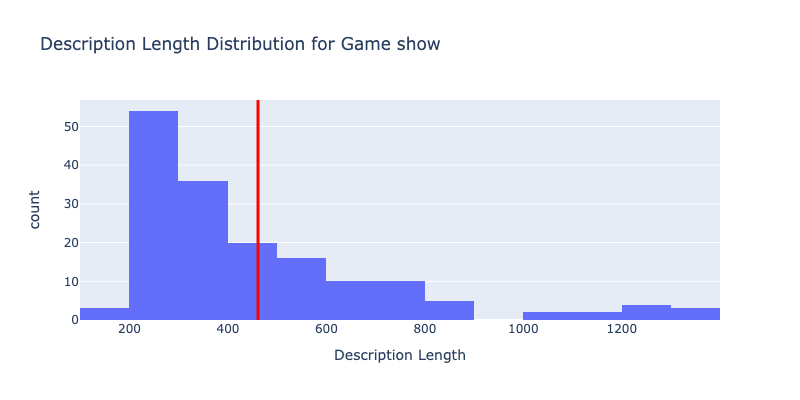

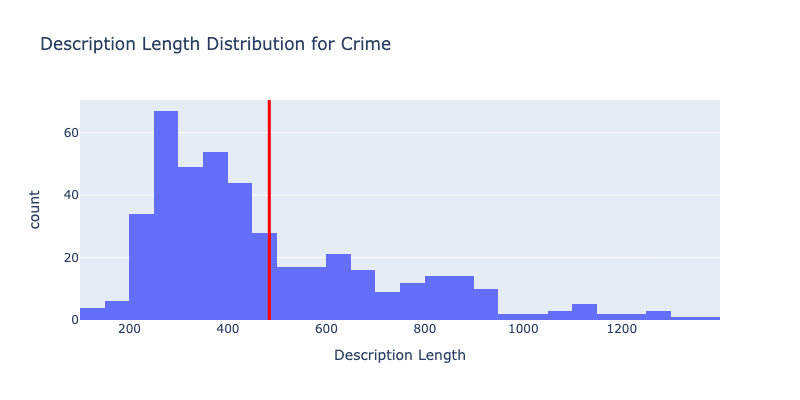

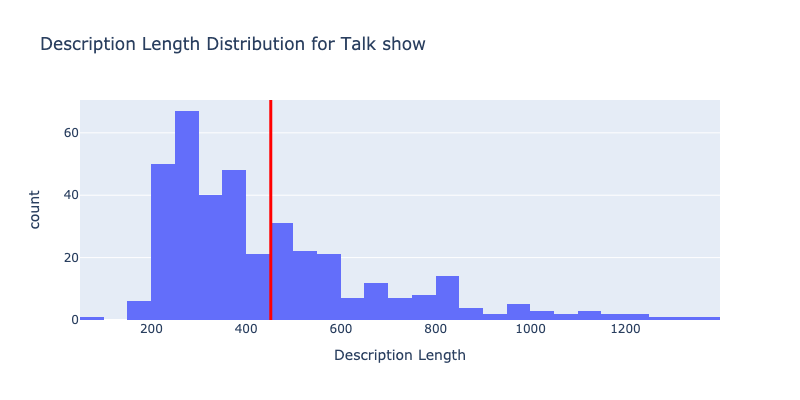

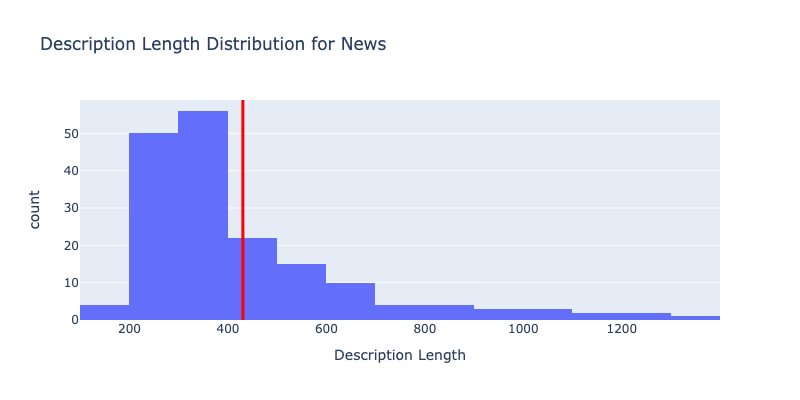

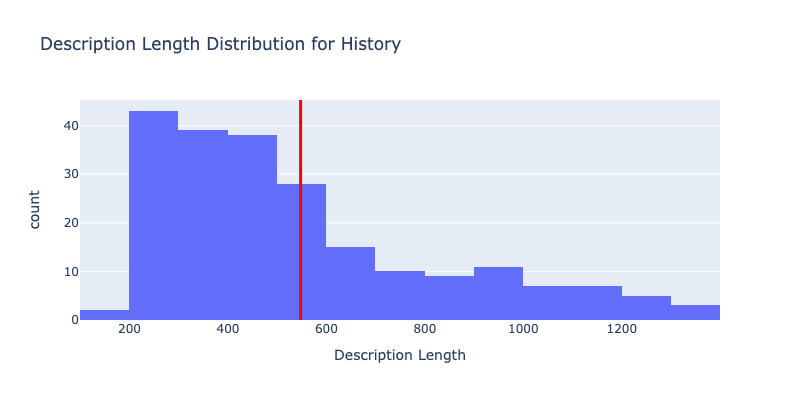

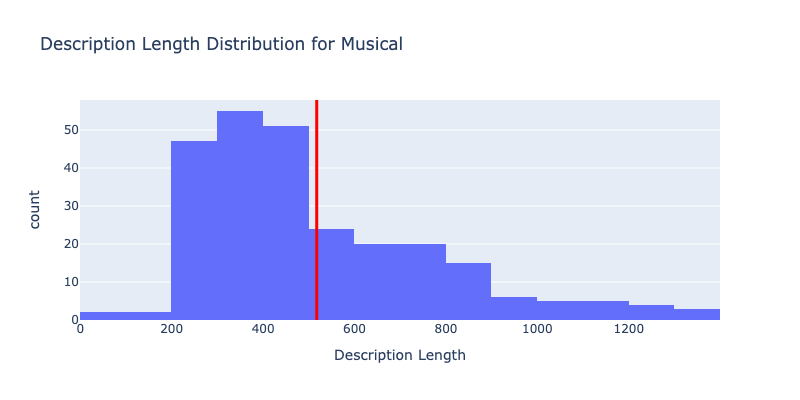

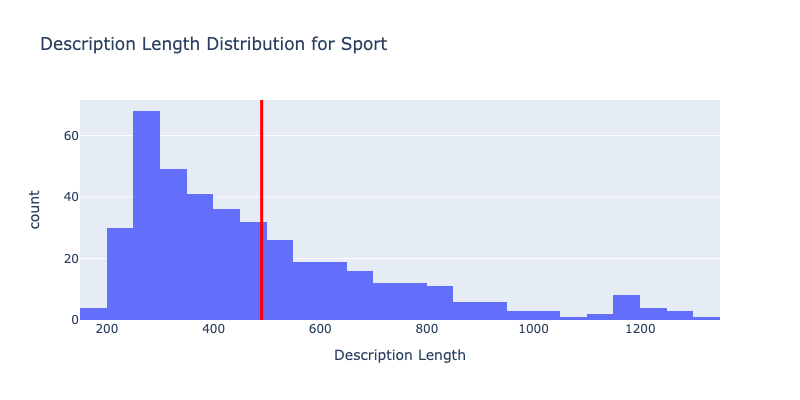

In [110]:
plot_decription_distr(descr_len_df2)

One can see that for genres like `drama` and `documentary`, most values tend to have around just under 600 words per description.

In [112]:
# Exporting all of the clean data
df.to_csv(r'/Users/andrewalarcon/Desktop/work/Brainstation/Capstone/capstone-repo/data/movies_clean.csv', index = False)


In [ ]:
# Exporting the data excluding war, news, and game show. 
# This will be used on the Logistic and Random Forest models to see if performance improves without these 3 genres

df_new = df.drop(df[(df['Genre'] == 'game show') & (df['Genre'] == 'war') & (df['Genre'] == 'news')].index)

In [ ]:
df_new.to_csv(r'/Users/andrewalarcon/Desktop/work/Brainstation/Capstone/capstone-repo/data/movies_clean_new.csv', index = False)

## Conclusion:

In this notebook, I properly cleaned the data so that it could be efficiently visualized to gain insights. I found that the top appearing genre's in the dataset were `documentary`, `drama`, `comedy`, `shorts`, and `horror`. I also discovered that descriptions across most genres tend to have a mean of around 500 words.

In the next notebook, I will continue with data preparation by vectorizing the data, and gaining further insights from it.